In [ ]:
import pandas as pd
import numpy as np
import requests
import time
import csv
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import os
import seaborn as sns
import string
import tensorflow as tf
from tensorflow import keras

# Import data
## import data from download folder and sort

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TechLabs/0804_propdetail_clean_orangecounty.csv", index_col="zpid_index")
df_data = pd.DataFrame(df)
df_data.sort_values(by='price', ascending = False, inplace = True)

In [ ]:
df_data.head(10)

,resoFacts.hasFireplace,dateSold,listed_by.business_name,zestimate,zpid,address.zipcode,price,homeStatus,address.streetAddress,bathrooms,resoFacts.hasPrivatePool,resoFacts.hasGarage,propertyTaxRate,longitude,resoFacts.hasCooling,latitude,livingArea,pageViewCount,resoFacts.hasSpa,bedrooms,resoFacts.architecturalStyle,datePosted,resoFacts.heating,rentZestimate,resoFacts.garageSpaces,resoFacts.pricePerSquareFoot,address.state,resoFacts.homeType,resoFacts.basement,resoFacts.taxAnnualAmount,address.city,annualHomeownersInsurance,favoriteCount,yearBuilt,resoFacts.lotSize
zpid_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69248575,True,NaN,Compass,31945500.0,69248575,92657,69800000,FOR_SALE,6 Midsummer,13.0,True,True,0.69,-117.827000,True,33.582485,15500.0,20368,True,7.0,NaN,2021-09-07,"['Central', 'Zoned']",210726.0,10.0,4503.0,CA,SingleFamily,Finished,152815.0,Newport Coast,293160,537,2021.0,0.61 Acres
250186188,True,NaN,Compass,29243400.0,250186188,92657,62000000,FOR_SALE,46 Deep Sea,10.0,True,True,0.69,-117.829450,True,33.577860,14500.0,18200,True,6.0,Contemporary,2022-07-22,['Central'],112809.0,NaN,4276.0,CA,SingleFamily,NaN,132961.0,Newport Coast,260400,540,NaN,0.45 Acres
64457805,True,2010-03-25,Compass,NaN,64457805,92657,59800000,FOR_SALE,31 High Water,12.0,True,True,0.69,-117.828880,True,33.579136,15000.0,17088,True,7.0,NaN,2021-06-10,"['Central', 'Zoned']",180507.0,8.0,3987.0,CA,SingleFamily,Finished,118849.0,Newport Coast,251160,253,2014.0,0.64 Acres
59725819,True,2017-04-28,Coldwell Banker Realty,NaN,59725819,92603,49950000,FOR_SALE,76 Golden Eagle,12.0,True,True,0.69,-117.792190,True,33.619680,12978.0,11436,True,7.0,Custom Built,2021-07-26,['Central'],46481.0,6.0,3849.0,CA,SingleFamily,NaN,148774.0,Irvine,209790,209,2007.0,0.87 Acres
125114394,True,2013-04-25,"Douglas Elliman of California, Inc.",45368900.0,125114394,92677,48888888,FOR_SALE,13 Old Ranch Rd,10.0,True,True,0.69,-117.687065,True,33.494507,14500.0,68882,True,6.0,Modern,2022-02-07,"['Electric', 'Solar', 'Forced Air', 'Natural G...",44614.0,8.0,3372.0,CA,SingleFamily,NaN,74415.0,Laguna Niguel,205333,2086,2016.0,13.29 Acres
25465013,True,2017-06-20,Coldwell Banker Realty,43700584.0,25465013,92663,47500000,FOR_SALE,309 Via Lido Soud,6.0,True,True,0.69,-117.922740,True,33.613950,8868.0,12510,False,4.0,"Contemporary,Custom Built",2022-05-04,"['Central', 'Fireplace(s)']",50505.0,6.0,5356.0,CA,SingleFamily,NaN,111238.0,Newport Beach,199500,270,2018.0,"9,450 sqft"
2068562939,False,NaN,Compass,NaN,2068562939,92651,46500000,FOR_SALE,32221 S Coast Hwy,6.0,False,True,0.69,-117.737670,True,33.495120,3243.0,10603,True,7.0,NaN,2021-09-17,['Electric'],NaN,4.0,14339.0,CA,SingleFamily,NaN,NaN,Laguna Beach,195300,181,1968.0,3.70 Acres
25503212,True,2017-06-01,Luxe Real Estate,NaN,25503212,92657,45000000,FOR_SALE,1 Pelican Crest Dr,11.0,True,True,0.69,-117.845170,True,33.595036,13437.0,9728,True,7.0,NaN,2021-07-18,"['Central', 'Zoned']",135977.0,8.0,3349.0,CA,SingleFamily,NaN,246707.0,Newport Coast,189000,184,2010.0,0.73 Acres
25140086,True,NaN,Coldwell Banker Realty,35139600.0,25140086,92651,37800000,FOR_SALE,154 Emerald Bay,9.0,False,True,0.69,-117.811640,True,33.553180,11086.0,13421,True,7.0,French,2022-07-11,"['Central', 'Zoned']",54753.0,3.0,3410.0,CA,SingleFamily,NaN,26015.0,Laguna Beach,158760,203,1986.0,0.39 Acres


# Let's change column order & start changing data types
For better handling we want to convert ZIP-Code to a string, as well as bedrooms & bathrooms, zestimates, living area and garage spaces to integer for better readibility. In a later step we need to convert lot sizes stated in Acres to squarefeet, as well as do some transformations in the columns 'architectural style' and 'heating'.

In [ ]:
column_order = ["zpid","homeStatus","resoFacts.homeType","yearBuilt","bedrooms","bathrooms","datePosted","pageViewCount","favoriteCount","longitude","latitude","address.state","address.zipcode","address.city","address.streetAddress","price","zestimate","rentZestimate","livingArea","resoFacts.pricePerSquareFoot","resoFacts.lotSize","annualHomeownersInsurance","propertyTaxRate","resoFacts.architecturalStyle","resoFacts.taxAnnualAmount","dateSold","resoFacts.heating","resoFacts.hasCooling","resoFacts.garageSpaces","resoFacts.hasGarage","resoFacts.basement","resoFacts.hasPrivatePool","resoFacts.hasFireplace","resoFacts.hasSpa","listed_by.business_name"]
df_data_raw = df_data
df_data=df_data.reindex(columns = column_order)

df_data =  df_data.fillna(0).astype({'address.zipcode':'string','yearBuilt':'int', 'bedrooms':'int', 'bathrooms':'int', 'zestimate':'int', 'rentZestimate':'int', 'livingArea':'int', 'resoFacts.garageSpaces':'int'})
df_data['yearsOld'] = 2022-df_data['yearBuilt']



# Convert lotsize numbers into metric system

In [ ]:
df_data['größe'], df_data['umrechnung'] = df_data['resoFacts.lotSize'].str.split(' ',1).str




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [ ]:
df_data['größe'] = df_data['größe'].str.replace(',','')
df_data = df_data.astype(dtype={"größe": 'float', 'umrechnung': 'string', "address.zipcode": 'int'})


In [ ]:
df_data['umrechnung'] = df_data['umrechnung'].replace({'Acres': 4046.86, 'sqft': 0.092903})

In [ ]:
df_data['größe_metrisch'] = df_data['größe']*df_data['umrechnung']

In [ ]:
df_data


,zpid,homeStatus,resoFacts.homeType,yearBuilt,bedrooms,bathrooms,datePosted,pageViewCount,favoriteCount,longitude,latitude,address.state,address.zipcode,address.city,address.streetAddress,price,zestimate,rentZestimate,livingArea,resoFacts.pricePerSquareFoot,resoFacts.lotSize,annualHomeownersInsurance,propertyTaxRate,resoFacts.architecturalStyle,resoFacts.taxAnnualAmount,dateSold,resoFacts.heating,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.basement,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,listed_by.business_name,yearsOld,größe,umrechnung,größe_metrisch
zpid_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69248575,69248575,FOR_SALE,SingleFamily,2021,7,13,2021-09-07,20368,537,-117.827000,33.582485,CA,92657,Newport Coast,6 Midsummer,69800000,31945500,210726,15500,4503.0,0.61 Acres,293160,0.69,0,152815.0,0,"['Central', 'Zoned']",True,10,True,Finished,True,True,True,Compass,1,0.61,4046.86,2468.5846
250186188,250186188,FOR_SALE,SingleFamily,0,6,10,2022-07-22,18200,540,-117.829450,33.577860,CA,92657,Newport Coast,46 Deep Sea,62000000,29243400,112809,14500,4276.0,0.45 Acres,260400,0.69,Contemporary,132961.0,0,['Central'],True,0,True,0,True,True,True,Compass,2022,0.45,4046.86,1821.087
64457805,64457805,FOR_SALE,SingleFamily,2014,7,12,2021-06-10,17088,253,-117.828880,33.579136,CA,92657,Newport Coast,31 High Water,59800000,0,180507,15000,3987.0,0.64 Acres,251160,0.69,0,118849.0,2010-03-25,"['Central', 'Zoned']",True,8,True,Finished,True,True,True,Compass,8,0.64,4046.86,2589.9904
59725819,59725819,FOR_SALE,SingleFamily,2007,7,12,2021-07-26,11436,209,-117.792190,33.619680,CA,92603,Irvine,76 Golden Eagle,49950000,0,46481,12978,3849.0,0.87 Acres,209790,0.69,Custom Built,148774.0,2017-04-28,['Central'],True,6,True,0,True,True,True,Coldwell Banker Realty,15,0.87,4046.86,3520.7682
125114394,125114394,FOR_SALE,SingleFamily,2016,6,10,2022-02-07,68882,2086,-117.687065,33.494507,CA,92677,Laguna Niguel,13 Old Ranch Rd,48888888,45368900,44614,14500,3372.0,13.29 Acres,205333,0.69,Modern,74415.0,2013-04-25,"['Electric', 'Solar', 'Forced Air', 'Natural G...",True,8,True,0,True,True,True,"Douglas Elliman of California, Inc.",6,13.29,4046.86,53782.7694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25107961,25107961,FOR_SALE,SingleFamily,1922,2,1,2022-07-18,3903,58,-117.939705,33.934050,CA,90631,La Habra,312 Florence Ct,525000,525600,2285,771,681.0,"3,576 sqft",2205,0.69,Bungalow,607.0,0,['Wall'],True,0,False,0,0,False,False,The Agency,100,3576.00,0.092903,332.221128
25279042,25279042,FOR_SALE,SingleFamily,1964,1,1,2022-07-19,5121,121,-117.956710,33.674152,CA,92646,Huntington Beach,19860 Claremont Ln,489999,485100,1924,600,817.0,800 sqft,2058,0.69,Traditional,4144.0,2016-08-04,['Forced Air'],True,0,False,0,False,True,True,The L3,58,800.00,0.092903,74.3224
25199145,25199145,FOR_SALE,SingleFamily,1935,3,0,2022-06-09,5320,75,-117.617065,33.746696,CA,92676,Silverado,29423 Silverado Canyon Rd,459000,459971,4900,1064,431.0,"6,375 sqft",1928,0.69,"Cottage,Ranch",275.0,2021-11-12,"['None', 'Fireplace(s)']",True,0,False,0,False,True,False,Coldwell Banker Realty,87,6375.00,0.092903,592.256625


In [ ]:
df_data.shape

(800, 39)

In [ ]:
df_data.dtypes

zpid                              int64
homeStatus                       object
resoFacts.homeType               object
yearBuilt                         int64
bedrooms                          int64
bathrooms                         int64
datePosted                       object
pageViewCount                     int64
favoriteCount                     int64
longitude                       float64
latitude                        float64
address.state                    object
address.zipcode                   int64
address.city                     object
address.streetAddress            object
price                             int64
zestimate                         int64
rentZestimate                     int64
livingArea                        int64
resoFacts.pricePerSquareFoot    float64
resoFacts.lotSize                object
annualHomeownersInsurance         int64
propertyTaxRate                 float64
resoFacts.architecturalStyle     object
resoFacts.taxAnnualAmount       float64


The variable "größe_metrisch" is still an object type. Change it to a float64 type.

In [ ]:
df_data =  df_data.fillna(0).astype({'größe_metrisch':'float'})

In [ ]:
df_data.dtypes

zpid                              int64
homeStatus                       object
resoFacts.homeType               object
yearBuilt                         int64
bedrooms                          int64
bathrooms                         int64
datePosted                       object
pageViewCount                     int64
favoriteCount                     int64
longitude                       float64
latitude                        float64
address.state                    object
address.zipcode                   int64
address.city                     object
address.streetAddress            object
price                             int64
zestimate                         int64
rentZestimate                     int64
livingArea                        int64
resoFacts.pricePerSquareFoot    float64
resoFacts.lotSize                object
annualHomeownersInsurance         int64
propertyTaxRate                 float64
resoFacts.architecturalStyle     object
resoFacts.taxAnnualAmount       float64


Shuffle the dataset for further work. We need to shuffle it for our Model to work later.

In [ ]:
df_data = df_data.sample(n=len(df_data), random_state=1)
df_data

,zpid,homeStatus,resoFacts.homeType,yearBuilt,bedrooms,bathrooms,datePosted,pageViewCount,favoriteCount,longitude,latitude,address.state,address.zipcode,address.city,address.streetAddress,price,zestimate,rentZestimate,livingArea,resoFacts.pricePerSquareFoot,resoFacts.lotSize,annualHomeownersInsurance,propertyTaxRate,resoFacts.architecturalStyle,resoFacts.taxAnnualAmount,dateSold,resoFacts.heating,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.basement,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,listed_by.business_name,yearsOld,größe,umrechnung,größe_metrisch
zpid_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25140086,25140086,FOR_SALE,SingleFamily,1986,7,9,2022-07-11,13421,203,-117.811640,33.553180,CA,92651,Laguna Beach,154 Emerald Bay,37800000,35139600,54753,11086,3410.0,0.39 Acres,158760,0.69,French,26015.0,0,"['Central', 'Zoned']",True,3,True,0,False,True,True,Coldwell Banker Realty,36,0.39,4046.860000,1578.275400
25483422,25483422,FOR_SALE,SingleFamily,1971,4,2,2022-06-20,3589,82,-117.782100,33.699425,CA,92604,Irvine,4472 Robinwood Cir,1100000,1102994,3399,1176,935.0,"5,000 sqft",4620,0.69,Ranch,7974.0,2018-08-06,"['Central', 'Forced Air', 'Natural Gas']",True,2,True,0,False,True,False,Re/Max Premier Realty,51,5000.00,0.092903,464.515000
25353397,25353397,FOR_SALE,SingleFamily,2003,3,5,2022-06-08,5231,146,-117.891710,33.890150,CA,92831,Fullerton,1738 Rocky Rd,2500000,2500001,6994,4611,542.0,0.40 Acres,10500,0.69,Cape Cod,9872.0,0,['Central'],True,3,True,0,True,True,True,T.N.G. Real Estate Consultants,19,0.40,4046.860000,1618.744000
2063385179,2063385179,FOR_SALE,SingleFamily,2022,2,3,2022-08-03,35,2,-117.587425,33.523537,CA,92694,Ladera Ranch,"Plan 2 Plan, Wildrose at Rancho Mission Viejo",789915,0,0,1313,602.0,0,3318,0.69,0,0.0,0,0,False,0,False,0,0,0,False,Tri Pointe Homes,0,0.00,0.000000,0.000000
25597366,25597366,FOR_SALE,SingleFamily,1988,4,3,2022-05-29,5846,178,-117.649440,33.449944,CA,92624,Dana Pt,35271 Vista De Todo,1899500,1899517,10351,3659,519.0,"7,198 sqft",7978,0.69,"Colonial,Craftsman,Custom Built",5233.0,1988-02-18,['Central'],True,2,True,0,False,True,False,Keller Williams OC Coastal Realty,34,7198.00,0.092903,668.715794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129224,25129224,FOR_SALE,SingleFamily,1954,4,2,2022-07-19,2391,101,-117.927790,33.818490,CA,92802,Anaheim,953 S Salem St,799900,828700,3229,1339,597.0,"7,857 sqft",3360,0.69,0,6889.0,2020-01-22,0,True,2,True,0,False,True,False,L.S. Gateway Realtors,68,7857.00,0.092903,729.938871
25145636,25145636,FOR_SALE,SingleFamily,1949,3,1,2022-07-08,7043,287,-117.992676,33.876100,CA,90621,Buena Park,8052 Franklin St,695000,695004,2765,985,706.0,"7,326 sqft",2919,0.69,Traditional,5670.0,2016-08-10,"['Central', 'Forced Air']",True,2,True,0,True,False,False,Redfin,73,7326.00,0.092903,680.607378
25597467,25597467,FOR_SALE,SingleFamily,1993,5,5,2022-06-12,4817,127,-117.655990,33.448680,CA,92624,Dana Pt,35451 Beach Rd,6789000,6651098,22349,3711,1829.0,"4,873 sqft",28514,0.69,"Contemporary,Custom Built",48416.0,2001-08-03,['Radiant'],True,2,True,0,False,True,True,Surterre Properties Inc.,29,4873.00,0.092903,452.716319


In [ ]:
df2 = df_data.drop(['zpid', 'homeStatus', 'resoFacts.homeType', 'yearBuilt', 'datePosted', 'pageViewCount', 'favoriteCount', 'address.state', 'address.zipcode',
                    'address.streetAddress', 'zestimate', 'rentZestimate', 'resoFacts.lotSize', 'dateSold', 'propertyTaxRate', 'resoFacts.architecturalStyle', 'resoFacts.heating', 'resoFacts.basement', 'listed_by.business_name', 'größe', 'umrechnung'], axis='columns')
df2

,bedrooms,bathrooms,longitude,latitude,address.city,price,livingArea,resoFacts.pricePerSquareFoot,annualHomeownersInsurance,resoFacts.taxAnnualAmount,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,yearsOld,größe_metrisch
zpid_index,,,,,,,,,,,,,,,,,,
25140086,7,9,-117.811640,33.553180,Laguna Beach,37800000,11086,3410.0,158760,26015.0,True,3,True,False,True,True,36,1578.275400
25483422,4,2,-117.782100,33.699425,Irvine,1100000,1176,935.0,4620,7974.0,True,2,True,False,True,False,51,464.515000
25353397,3,5,-117.891710,33.890150,Fullerton,2500000,4611,542.0,10500,9872.0,True,3,True,True,True,True,19,1618.744000
2063385179,2,3,-117.587425,33.523537,Ladera Ranch,789915,1313,602.0,3318,0.0,False,0,False,0,0,False,0,0.000000
25597366,4,3,-117.649440,33.449944,Dana Pt,1899500,3659,519.0,7978,5233.0,True,2,True,False,True,False,34,668.715794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129224,4,2,-117.927790,33.818490,Anaheim,799900,1339,597.0,3360,6889.0,True,2,True,False,True,False,68,729.938871
25145636,3,1,-117.992676,33.876100,Buena Park,695000,985,706.0,2919,5670.0,True,2,True,True,False,False,73,680.607378
25597467,5,5,-117.655990,33.448680,Dana Pt,6789000,3711,1829.0,28514,48416.0,True,2,True,False,True,True,29,452.716319


# Data Cleaning

The next step is to clean the data, so that we get more realistic values for the the further analysis.


Checking NA & Null Values:

In [ ]:
df2.isna().sum()

bedrooms                        0
bathrooms                       0
longitude                       0
latitude                        0
address.city                    0
price                           0
livingArea                      0
resoFacts.pricePerSquareFoot    0
annualHomeownersInsurance       0
resoFacts.taxAnnualAmount       0
resoFacts.hasCooling            0
resoFacts.garageSpaces          0
resoFacts.hasGarage             0
resoFacts.hasPrivatePool        0
resoFacts.hasFireplace          0
resoFacts.hasSpa                0
yearsOld                        0
größe_metrisch                  0
dtype: int64

In [ ]:
df2.isnull().sum()

bedrooms                        0
bathrooms                       0
longitude                       0
latitude                        0
address.city                    0
price                           0
livingArea                      0
resoFacts.pricePerSquareFoot    0
annualHomeownersInsurance       0
resoFacts.taxAnnualAmount       0
resoFacts.hasCooling            0
resoFacts.garageSpaces          0
resoFacts.hasGarage             0
resoFacts.hasPrivatePool        0
resoFacts.hasFireplace          0
resoFacts.hasSpa                0
yearsOld                        0
größe_metrisch                  0
dtype: int64

In [ ]:
#df2['price_per_m2'] = df2['price']/df2['größe_metrisch']
df2

,bedrooms,bathrooms,longitude,latitude,address.city,price,livingArea,resoFacts.pricePerSquareFoot,annualHomeownersInsurance,resoFacts.taxAnnualAmount,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,yearsOld,größe_metrisch
zpid_index,,,,,,,,,,,,,,,,,,
25140086,7,9,-117.811640,33.553180,Laguna Beach,37800000,11086,3410.0,158760,26015.0,True,3,True,False,True,True,36,1578.275400
25483422,4,2,-117.782100,33.699425,Irvine,1100000,1176,935.0,4620,7974.0,True,2,True,False,True,False,51,464.515000
25353397,3,5,-117.891710,33.890150,Fullerton,2500000,4611,542.0,10500,9872.0,True,3,True,True,True,True,19,1618.744000
2063385179,2,3,-117.587425,33.523537,Ladera Ranch,789915,1313,602.0,3318,0.0,False,0,False,0,0,False,0,0.000000
25597366,4,3,-117.649440,33.449944,Dana Pt,1899500,3659,519.0,7978,5233.0,True,2,True,False,True,False,34,668.715794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129224,4,2,-117.927790,33.818490,Anaheim,799900,1339,597.0,3360,6889.0,True,2,True,False,True,False,68,729.938871
25145636,3,1,-117.992676,33.876100,Buena Park,695000,985,706.0,2919,5670.0,True,2,True,True,False,False,73,680.607378
25597467,5,5,-117.655990,33.448680,Dana Pt,6789000,3711,1829.0,28514,48416.0,True,2,True,False,True,True,29,452.716319


In [ ]:
df2['price_per_sqft'] = df2['resoFacts.pricePerSquareFoot']
df2 = df2.drop(['resoFacts.pricePerSquareFoot'], axis='columns')
df2

,bedrooms,bathrooms,longitude,latitude,address.city,price,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,yearsOld,größe_metrisch,price_per_sqft
zpid_index,,,,,,,,,,,,,,,,,,
25140086,7,9,-117.811640,33.553180,Laguna Beach,37800000,11086,158760,26015.0,True,3,True,False,True,True,36,1578.275400,3410.0
25483422,4,2,-117.782100,33.699425,Irvine,1100000,1176,4620,7974.0,True,2,True,False,True,False,51,464.515000,935.0
25353397,3,5,-117.891710,33.890150,Fullerton,2500000,4611,10500,9872.0,True,3,True,True,True,True,19,1618.744000,542.0
2063385179,2,3,-117.587425,33.523537,Ladera Ranch,789915,1313,3318,0.0,False,0,False,0,0,False,0,0.000000,602.0
25597366,4,3,-117.649440,33.449944,Dana Pt,1899500,3659,7978,5233.0,True,2,True,False,True,False,34,668.715794,519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129224,4,2,-117.927790,33.818490,Anaheim,799900,1339,3360,6889.0,True,2,True,False,True,False,68,729.938871,597.0
25145636,3,1,-117.992676,33.876100,Buena Park,695000,985,2919,5670.0,True,2,True,True,False,False,73,680.607378,706.0
25597467,5,5,-117.655990,33.448680,Dana Pt,6789000,3711,28514,48416.0,True,2,True,False,True,True,29,452.716319,1829.0


# Outlier Removal

In [ ]:
df2[df2.price_per_sqft>5000]

,bedrooms,bathrooms,longitude,latitude,address.city,price,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,yearsOld,größe_metrisch,price_per_sqft
zpid_index,,,,,,,,,,,,,,,,,,
25142157,5,6,-117.738650,33.492800,Laguna Beach,31995000,6135,134379,131716.0,True,6,True,True,True,True,9,1578.27540,5215.0
25465013,4,6,-117.922740,33.613950,Newport Beach,47500000,8868,199500,111238.0,True,6,True,True,True,False,4,877.93335,5356.0
2068562939,7,6,-117.737670,33.495120,Laguna Beach,46500000,3243,195300,0.0,True,4,True,False,False,True,54,14973.38200,14339.0
25575253,2,3,-117.743324,33.499123,Laguna Beach,32000000,4317,134400,14066.0,True,2,True,False,True,True,63,1133.12080,7413.0


In [ ]:
#df3 = df2.drop(df2[df2.price_per_sqft>100000].index)
df3 = df2

Check if the number of Bedroom & Bathrooms is making sense with the size of the house. Is there something suspicious ? 

In [ ]:
print(df3['bedrooms'].unique())
print(df3['bathrooms'].unique())

[7 4 3 2 5 6 8 1 0]
[ 9  2  5  3  7  4  6 11 12  8  1  0 13 10]


Because 9+ Bathrooms is a high number, we want to check if there is something suspicious ( Looks valid )

In [ ]:
df3[df3.bathrooms>9]

,bedrooms,bathrooms,longitude,latitude,address.city,price,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,yearsOld,größe_metrisch,price_per_sqft
zpid_index,,,,,,,,,,,,,,,,,,
63113044,7,11,-117.794650,33.622740,Irvine,21995000,15088,92379,200741.0,True,5,True,True,True,True,19,5746.541200,1458.0
59725819,7,12,-117.792190,33.619680,Irvine,49950000,12978,209790,148774.0,True,6,True,True,True,True,15,3520.768200,3849.0
69248575,7,13,-117.827000,33.582485,Newport Coast,69800000,15500,293160,152815.0,True,10,True,True,True,True,1,2468.584600,4503.0
25503399,7,12,-117.838420,33.590070,Newport Coast,27995000,14196,117579,68887.0,True,8,True,True,True,True,21,2023.430000,1972.0
69248545,8,11,-117.825410,33.579610,Newport Coast,27600000,13787,115920,42517.0,True,7,True,True,True,False,0,2751.864800,2002.0
69250163,8,10,-117.714386,33.465294,Dana Point,17500000,7421,73500,91225.0,True,4,True,True,True,True,1,871.523043,2358.0
125114394,6,10,-117.687065,33.494507,Laguna Niguel,48888888,14500,205333,74415.0,True,8,True,True,True,True,6,53782.769400,3372.0
64457805,7,12,-117.828880,33.579136,Newport Coast,59800000,15000,251160,118849.0,True,8,True,True,True,True,8,2589.990400,3987.0
250186188,6,10,-117.829450,33.577860,Newport Coast,62000000,14500,260400,132961.0,True,0,True,True,True,True,2022,1821.087000,4276.0


Outlier Removal using Standard Deviation and Mean

In [ ]:
df3.price_per_sqft.describe()

count      800.000000
mean       877.253750
std        860.313954
min          0.000000
25%        541.750000
50%        642.000000
75%        810.750000
max      14339.000000
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df3.groupby('address.city'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(574, 18)

In [ ]:
df4.price_per_sqft.describe()

count     574.000000
mean      832.764808
std       597.633610
min       416.000000
25%       552.250000
50%       636.000000
75%       799.000000
max      5215.000000
Name: price_per_sqft, dtype: float64

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

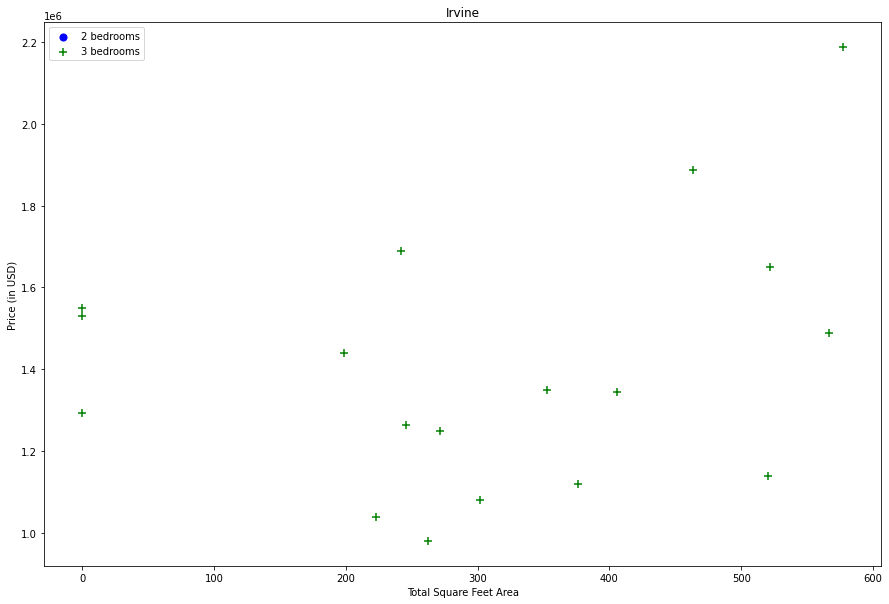

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df4[(df['address.city']==location) & (df4.bedrooms==2)]
    bhk3 = df4[(df['address.city']==location) & (df4.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.größe_metrisch,bhk2.price,color='blue',label='2 bedrooms', s=50)
    plt.scatter(bhk3.größe_metrisch,bhk3.price,marker='+', color='green',label='3 bedrooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (in USD)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Irvine")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk.

In [ ]:
df4

,bedrooms,bathrooms,longitude,latitude,address.city,price,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,yearsOld,größe_metrisch,price_per_sqft
0,4,3,-117.734220,33.592022,Aliso Viejo,1450000,2229,6090,6222.0,True,3,True,True,True,True,30,447.420848,651.0
1,3,3,-117.735245,33.579700,Aliso Viejo,1585000,2560,6657,4963.0,True,2,True,False,True,False,27,313.547625,619.0
2,3,3,-117.732150,33.572502,Aliso Viejo,975000,1604,4095,5598.0,True,2,True,False,True,False,22,137.589343,608.0
3,5,4,-117.733765,33.571663,Aliso Viejo,1399880,2100,5879,8532.0,True,2,True,False,True,False,24,384.618420,667.0
4,4,3,-117.764786,33.873290,Anaheim,998000,2100,4192,3447.0,True,2,True,True,True,False,46,575.998600,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,4,2,-117.818120,33.897762,Yorba Linda,1049000,1634,4406,8564.0,True,2,True,False,True,False,50,984.307285,642.0
570,5,5,-117.804370,33.901314,Yorba Linda,2590000,4615,10878,22110.0,True,3,True,True,True,True,16,1537.806800,561.0
571,4,3,-117.806200,33.881317,Yorba Linda,1800000,2565,7560,12041.0,True,2,True,False,True,False,59,2144.835800,702.0
572,4,3,-117.763070,33.892838,Yorba Linda,1200000,2023,5040,4566.0,True,3,True,False,True,False,38,731.611125,593.0


In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df4.groupby('address.city'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(438, 18)

Text(0, 0.5, 'Count')

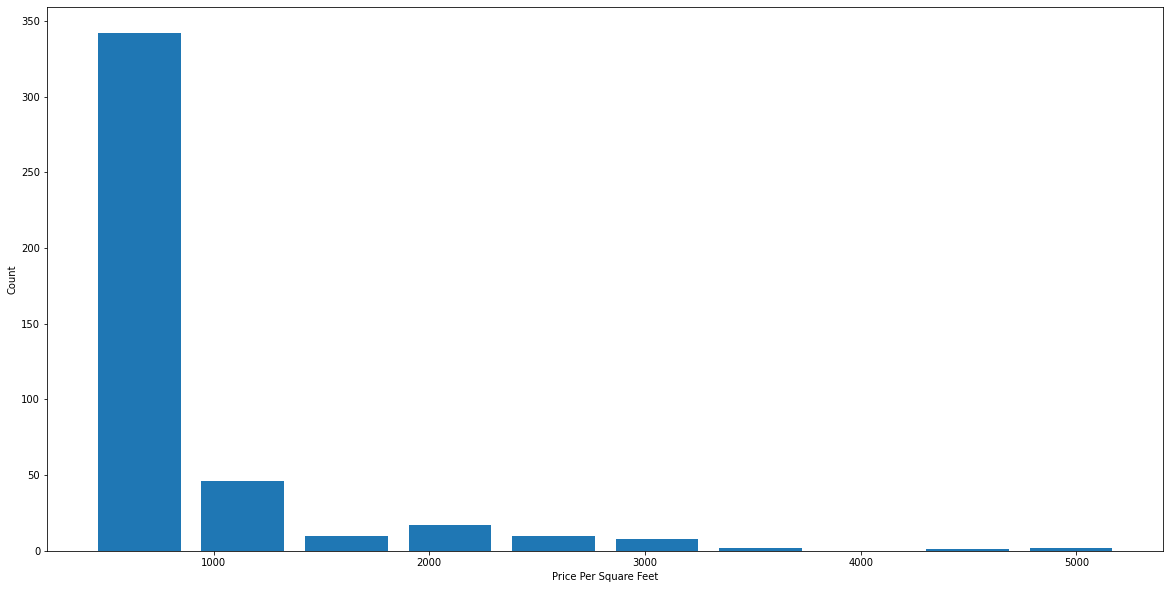

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Outlier Removal Using Bathrooms Feature

In [ ]:
df5.bathrooms.unique()

array([ 3,  4,  2,  5,  7,  8,  6,  1,  9, 12, 11])

Text(0, 0.5, 'Count')

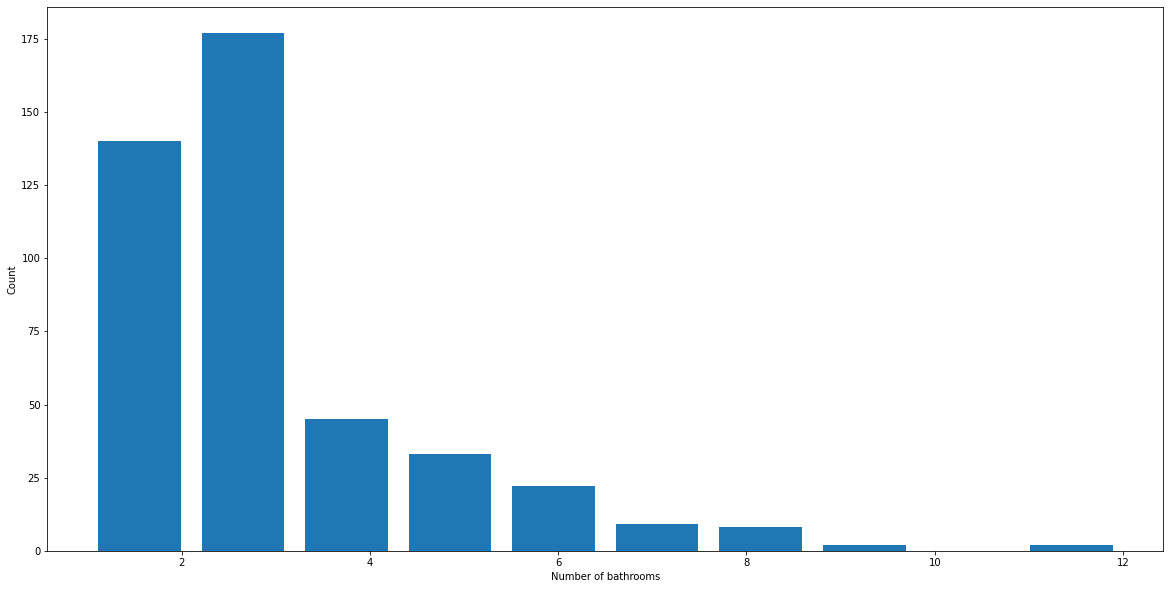

In [ ]:
plt.hist(df5.bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Checking if there are some "incorrect" data in the yearsOld column


In [ ]:
df5[df5.yearsOld > 200]

,bedrooms,bathrooms,longitude,latitude,address.city,price,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,yearsOld,größe_metrisch,price_per_sqft


In [ ]:
df5[df5.yearsOld == 0] #need to double check, if there are actually homes that are built within this year 

,bedrooms,bathrooms,longitude,latitude,address.city,price,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,yearsOld,größe_metrisch,price_per_sqft
58,4,5,-117.861490,33.594600,Corona Del Mar,8295000,4774,34839,46068.0,True,3,True,False,True,False,0,608.979165,1738.0
62,5,8,-117.863530,33.587250,Corona Del Mar,21995000,9100,92379,83149.0,True,10,True,True,True,True,0,1011.715000,2417.0
134,5,6,-117.965390,33.640095,Huntington Beach,4999000,5023,20996,13184.0,True,2,True,False,True,False,0,557.418000,995.0
194,4,4,-117.744190,33.741394,Irvine,2798888,2800,11755,0.0,True,2,True,False,False,True,0,371.612000,1000.0
210,3,3,-117.718900,33.669700,Irvine,1549990,2042,6510,0.0,False,0,False,0,0,False,0,0.000000,759.0
228,3,3,-117.726470,33.678610,Irvine,1440305,2138,6049,0.0,True,2,True,False,False,True,0,198.626614,674.0
240,3,3,-117.709600,33.671100,Irvine,1529990,2266,6426,0.0,False,0,False,0,0,False,0,0.000000,675.0
257,2,3,-117.587425,33.523537,Ladera Ranch,789915,1313,3318,0.0,False,0,False,0,0,False,0,0.000000,602.0
264,3,3,-117.587425,33.523537,Ladera Ranch,822154,1387,3453,0.0,False,0,False,0,0,False,0,0.000000,593.0
273,4,4,-117.762900,33.525043,Laguna Beach,7395000,3351,31059,17359.0,True,2,True,False,True,False,0,455.038894,2207.0


In [ ]:
df5 = df5.drop(df5[df5.yearsOld > 200].index)

df5 = df5.drop(df5[df5.yearsOld == 0].index)

# One Hot Encoding for ResoFacts


In [ ]:
df5["Cooling"] = df5["resoFacts.hasCooling"].astype(int)
df5["Garage"] = df5["resoFacts.hasGarage"].astype(int)
df5["PrivatePool"] = df5["resoFacts.hasPrivatePool"].astype(int)
df5["Fireplace"] = df5["resoFacts.hasFireplace"].astype(int)
df5["Spa"] = df5["resoFacts.hasSpa"].astype(int)
df5

,bedrooms,bathrooms,longitude,latitude,address.city,price,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,resoFacts.hasCooling,resoFacts.garageSpaces,resoFacts.hasGarage,resoFacts.hasPrivatePool,resoFacts.hasFireplace,resoFacts.hasSpa,yearsOld,größe_metrisch,price_per_sqft,Cooling,Garage,PrivatePool,Fireplace,Spa
0,4,3,-117.734220,33.592022,Aliso Viejo,1450000,2229,6090,6222.0,True,3,True,True,True,True,30,447.420848,651.0,1,1,1,1,1
1,3,3,-117.735245,33.579700,Aliso Viejo,1585000,2560,6657,4963.0,True,2,True,False,True,False,27,313.547625,619.0,1,1,0,1,0
2,3,3,-117.732150,33.572502,Aliso Viejo,975000,1604,4095,5598.0,True,2,True,False,True,False,22,137.589343,608.0,1,1,0,1,0
3,5,4,-117.733765,33.571663,Aliso Viejo,1399880,2100,5879,8532.0,True,2,True,False,True,False,24,384.618420,667.0,1,1,0,1,0
5,3,2,-117.988560,33.820520,Anaheim,895900,1790,3763,1536.0,True,2,True,True,True,False,67,668.901600,501.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,2,-117.815765,33.889317,Yorba Linda,800000,1136,3360,2734.0,True,2,True,False,True,False,106,323.395343,704.0,1,1,0,1,0
569,4,2,-117.818120,33.897762,Yorba Linda,1049000,1634,4406,8564.0,True,2,True,False,True,False,50,984.307285,642.0,1,1,0,1,0
571,4,3,-117.806200,33.881317,Yorba Linda,1800000,2565,7560,12041.0,True,2,True,False,True,False,59,2144.835800,702.0,1,1,0,1,0
572,4,3,-117.763070,33.892838,Yorba Linda,1200000,2023,5040,4566.0,True,3,True,False,True,False,38,731.611125,593.0,1,1,0,1,0


In [ ]:
df6 = df5.drop(["resoFacts.hasCooling","resoFacts.hasGarage","resoFacts.garageSpaces","resoFacts.hasPrivatePool","resoFacts.hasFireplace","resoFacts.hasSpa"], axis='columns')
df6

,bedrooms,bathrooms,longitude,latitude,address.city,price,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,yearsOld,größe_metrisch,price_per_sqft,Cooling,Garage,PrivatePool,Fireplace,Spa
0,4,3,-117.734220,33.592022,Aliso Viejo,1450000,2229,6090,6222.0,30,447.420848,651.0,1,1,1,1,1
1,3,3,-117.735245,33.579700,Aliso Viejo,1585000,2560,6657,4963.0,27,313.547625,619.0,1,1,0,1,0
2,3,3,-117.732150,33.572502,Aliso Viejo,975000,1604,4095,5598.0,22,137.589343,608.0,1,1,0,1,0
3,5,4,-117.733765,33.571663,Aliso Viejo,1399880,2100,5879,8532.0,24,384.618420,667.0,1,1,0,1,0
5,3,2,-117.988560,33.820520,Anaheim,895900,1790,3763,1536.0,67,668.901600,501.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,2,-117.815765,33.889317,Yorba Linda,800000,1136,3360,2734.0,106,323.395343,704.0,1,1,0,1,0
569,4,2,-117.818120,33.897762,Yorba Linda,1049000,1634,4406,8564.0,50,984.307285,642.0,1,1,0,1,0
571,4,3,-117.806200,33.881317,Yorba Linda,1800000,2565,7560,12041.0,59,2144.835800,702.0,1,1,0,1,0
572,4,3,-117.763070,33.892838,Yorba Linda,1200000,2023,5040,4566.0,38,731.611125,593.0,1,1,0,1,0


As we are using the longitude and latitude as features for our location, we can drop the address.city column:

In [ ]:
df6 = df6.drop(["address.city"], axis='columns')
df6

,bedrooms,bathrooms,longitude,latitude,price,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,yearsOld,größe_metrisch,price_per_sqft,Cooling,Garage,PrivatePool,Fireplace,Spa
0,4,3,-117.734220,33.592022,1450000,2229,6090,6222.0,30,447.420848,651.0,1,1,1,1,1
1,3,3,-117.735245,33.579700,1585000,2560,6657,4963.0,27,313.547625,619.0,1,1,0,1,0
2,3,3,-117.732150,33.572502,975000,1604,4095,5598.0,22,137.589343,608.0,1,1,0,1,0
3,5,4,-117.733765,33.571663,1399880,2100,5879,8532.0,24,384.618420,667.0,1,1,0,1,0
5,3,2,-117.988560,33.820520,895900,1790,3763,1536.0,67,668.901600,501.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,2,-117.815765,33.889317,800000,1136,3360,2734.0,106,323.395343,704.0,1,1,0,1,0
569,4,2,-117.818120,33.897762,1049000,1634,4406,8564.0,50,984.307285,642.0,1,1,0,1,0
571,4,3,-117.806200,33.881317,1800000,2565,7560,12041.0,59,2144.835800,702.0,1,1,0,1,0
572,4,3,-117.763070,33.892838,1200000,2023,5040,4566.0,38,731.611125,593.0,1,1,0,1,0


For our modelling, we are using the price_per_sqft as the dependent variable, so we have to drop the price column:

In [ ]:
df6 = df6.drop(["price"], axis='columns')
df6

,bedrooms,bathrooms,longitude,latitude,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,yearsOld,größe_metrisch,price_per_sqft,Cooling,Garage,PrivatePool,Fireplace,Spa
0,4,3,-117.734220,33.592022,2229,6090,6222.0,30,447.420848,651.0,1,1,1,1,1
1,3,3,-117.735245,33.579700,2560,6657,4963.0,27,313.547625,619.0,1,1,0,1,0
2,3,3,-117.732150,33.572502,1604,4095,5598.0,22,137.589343,608.0,1,1,0,1,0
3,5,4,-117.733765,33.571663,2100,5879,8532.0,24,384.618420,667.0,1,1,0,1,0
5,3,2,-117.988560,33.820520,1790,3763,1536.0,67,668.901600,501.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,2,-117.815765,33.889317,1136,3360,2734.0,106,323.395343,704.0,1,1,0,1,0
569,4,2,-117.818120,33.897762,1634,4406,8564.0,50,984.307285,642.0,1,1,0,1,0
571,4,3,-117.806200,33.881317,2565,7560,12041.0,59,2144.835800,702.0,1,1,0,1,0
572,4,3,-117.763070,33.892838,2023,5040,4566.0,38,731.611125,593.0,1,1,0,1,0


# Feature Selection: Correlation Analysis

What's the Purpose of Feature Selection
Many learning algorithms perform poorly on high-dimensional data. This is known as the curse of dimensionality

There are other reasons we may wish to reduce the number of features including:

1. Reducing computational cost

2. Reducing the cost associated with data collection

3. Improving Interpretability

In [ ]:
X = df6.drop(columns='price_per_sqft')
y = df6.price_per_sqft
y

0      651.0
1      619.0
2      608.0
3      667.0
5      501.0
       ...  
566    704.0
569    642.0
571    702.0
572    593.0
573    584.0
Name: price_per_sqft, Length: 423, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

cv = KFold(n_splits=10, shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 396.63
R_squared: 0.61


<h2>Filter Features by Variance</h2>
- We want to filter it by variance, because features with a low variance (close to 0) will not have a significant effect on the y variable (are not good predictors) and can be excluded.

In [ ]:
df6.var()

bedrooms                     9.715416e-01
bathrooms                    2.189170e+00
longitude                    1.800325e-02
latitude                     1.746836e-02
livingArea                   2.866498e+06
annualHomeownersInsurance    3.430310e+08
resoFacts.taxAnnualAmount    4.449800e+08
yearsOld                     4.089311e+02
größe_metrisch               8.380820e+05
price_per_sqft               4.094938e+05
Cooling                      0.000000e+00
Garage                       2.087325e-02
PrivatePool                  2.115335e-01
Fireplace                    8.964405e-02
Spa                          2.294041e-01
dtype: float64

In [ ]:
df6 = df6.drop('Cooling', axis='columns')

In [ ]:
X = df6.drop(columns='price_per_sqft')
y = df6.price_per_sqft

In [ ]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 396.63
R_squared: 0.61


<h2>Filter Features by Correlation</h2>
- Want to avoid correlation values between the explanatory variables above 0.8
- very dark and very light colours can be suspicious

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

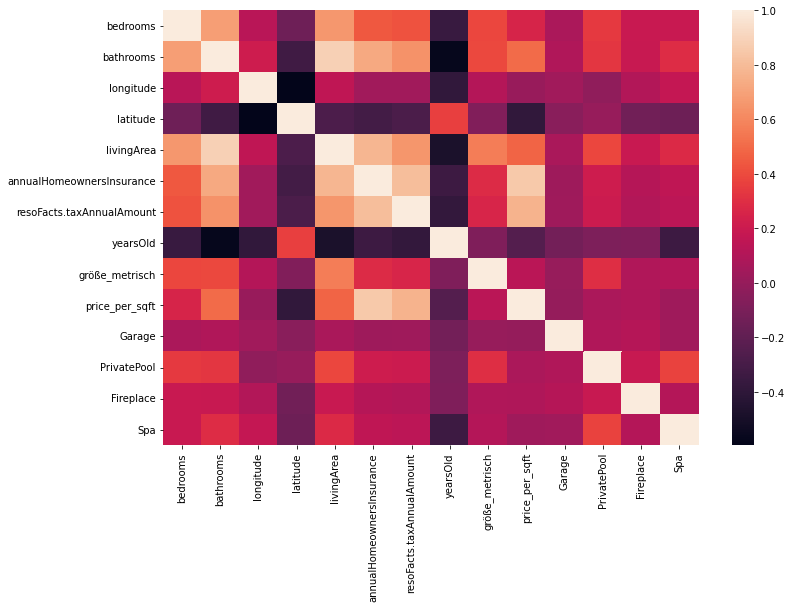

In [ ]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(df6.corr(), ax=ax)
plt.show()

In [ ]:
abs(df6.corr())

,bedrooms,bathrooms,longitude,latitude,livingArea,annualHomeownersInsurance,resoFacts.taxAnnualAmount,yearsOld,größe_metrisch,price_per_sqft,Garage,PrivatePool,Fireplace,Spa
bedrooms,1.000000,0.683307,0.132691,0.141517,0.657957,0.440607,0.424686,0.352559,0.383602,0.257453,0.083910,0.344153,0.191629,0.193872
bathrooms,0.683307,1.000000,0.212977,0.323917,0.886570,0.728250,0.642824,0.572812,0.393049,0.506252,0.100948,0.327478,0.186311,0.290560
longitude,0.132691,0.212977,1.000000,0.595010,0.154881,0.041317,0.046281,0.389107,0.109156,0.012043,0.046320,0.015833,0.107022,0.177513
latitude,0.141517,0.323917,0.595010,1.000000,0.274183,0.312983,0.281142,0.359901,0.075196,0.386928,0.042084,0.004000,0.130980,0.149721
livingArea,0.657957,0.886570,0.154881,0.274183,1.000000,0.780264,0.653594,0.477970,0.566515,0.479052,0.073026,0.384773,0.190458,0.282996
annualHomeownersInsurance,0.440607,0.728250,0.041317,0.312983,0.780264,1.000000,0.808384,0.336741,0.287141,0.854876,0.032007,0.211822,0.119004,0.155634
resoFacts.taxAnnualAmount,0.424686,0.642824,0.046281,0.281142,0.653594,0.808384,1.000000,0.381872,0.264482,0.764639,0.034541,0.206097,0.105295,0.141929
yearsOld,0.352559,0.572812,0.389107,0.359901,0.477970,0.336741,0.381872,1.000000,0.081883,0.240113,0.123837,0.085037,0.082521,0.337871
größe_metrisch,0.383602,0.393049,0.109156,0.075196,0.566515,0.287141,0.264482,0.081883,1.000000,0.136759,0.007289,0.301607,0.102090,0.109047
price_per_sqft,0.257453,0.506252,0.012043,0.386928,0.479052,0.854876,0.764639,0.240113,0.136759,1.000000,0.002677,0.083315,0.091701,0.039157


Living Area is highly correlated to bathrooms, annualHomeownersInsurance and taxAnnualAmount - want to delete it.

In [ ]:
abs(df6.corr()["livingArea"])

bedrooms                     0.657957
bathrooms                    0.886570
longitude                    0.154881
latitude                     0.274183
livingArea                   1.000000
annualHomeownersInsurance    0.780264
resoFacts.taxAnnualAmount    0.653594
yearsOld                     0.477970
größe_metrisch               0.566515
price_per_sqft               0.479052
Garage                       0.073026
PrivatePool                  0.384773
Fireplace                    0.190458
Spa                          0.282996
Name: livingArea, dtype: float64

In [ ]:
df6 = df6.drop('livingArea', axis='columns')

In [ ]:
abs(df6.corr()["price_per_sqft"][abs(df6.corr()["price_per_sqft"])>0.5].drop('price_per_sqft')).index.tolist()

['bathrooms', 'annualHomeownersInsurance', 'resoFacts.taxAnnualAmount']

In [ ]:
vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for val in vals:
    features = abs(df6.corr()["price_per_sqft"][abs(df6.corr()["price_per_sqft"])>val].drop('price_per_sqft')).index.tolist()
    
    X = df6.drop(columns='price_per_sqft')
    X=X[features]
    
    print(features)

    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))


['bedrooms', 'bathrooms', 'latitude', 'annualHomeownersInsurance', 'resoFacts.taxAnnualAmount', 'yearsOld', 'größe_metrisch']
RMSE: 375.44
R_squared: 0.65
['bedrooms', 'bathrooms', 'latitude', 'annualHomeownersInsurance', 'resoFacts.taxAnnualAmount', 'yearsOld']
RMSE: 383.96
R_squared: 0.64
['bathrooms', 'latitude', 'annualHomeownersInsurance', 'resoFacts.taxAnnualAmount']
RMSE: 360.04
R_squared: 0.68
['bathrooms', 'annualHomeownersInsurance', 'resoFacts.taxAnnualAmount']
RMSE: 357.98
R_squared: 0.69
['bathrooms', 'annualHomeownersInsurance', 'resoFacts.taxAnnualAmount']
RMSE: 357.98
R_squared: 0.69
['annualHomeownersInsurance', 'resoFacts.taxAnnualAmount']
RMSE: 379.3
R_squared: 0.65
['annualHomeownersInsurance', 'resoFacts.taxAnnualAmount']
RMSE: 379.3
R_squared: 0.65
['annualHomeownersInsurance']
RMSE: 360.72
R_squared: 0.68


In [ ]:
X = df6.drop(columns='price_per_sqft')[['bedrooms', 'bathrooms', 'latitude', 'annualHomeownersInsurance', 'resoFacts.taxAnnualAmount', 'yearsOld', 'größe_metrisch']]
y = df6['price_per_sqft']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 375.444
R_squared: 0.655


<h2>2nd Alternative: Feature Selection Using a Wrapper</h2>

In [ ]:
X = df6.drop(columns='price_per_sqft')
y = df6.price_per_sqft

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sfs1 = SFS(classifier_pipeline, 
           k_features=12, 
           forward=True, 
           scoring='neg_mean_squared_error',
           cv=cv)

sfs1.fit(X,y)

sfs1.subsets_

{1: {'feature_idx': (4,),
  'cv_scores': array([ -33598.65116279,  -62561.97767442,  -19103.19232558,
         -103397.69809524, -776416.41071429,  -22908.38452381,
         -151893.03690476,  -83454.71452381,  -38469.56619048,
          -15969.88333333]),
  'avg_score': -130777.3515448505,
  'feature_names': ('annualHomeownersInsurance',)},
 2: {'feature_idx': (1, 4),
  'cv_scores': array([ -26457.26209302,  -51914.43255814,  -11647.49162791,
          -64319.7947619 , -786625.99904762,  -13093.1352381 ,
          -83424.4647619 ,  -39262.20904762,  -27279.25690476,
           -7714.41571429]),
  'avg_score': -111173.84617552604,
  'feature_names': ('bathrooms', 'annualHomeownersInsurance')},
 3: {'feature_idx': (1, 4, 10),
  'cv_scores': array([ -40322.94      ,  -49654.23581395,  -13637.74953488,
          -70203.49452381, -777345.65642857,  -12958.27904762,
          -85532.6497619 ,  -38091.66404762,  -18924.95095238,
           -7405.23833333]),
  'avg_score': -111407.68584440753

In [ ]:
X = df6.drop(columns='price_per_sqft')[['bedrooms', 'bathrooms', 'latitude', 'annualHomeownersInsurance', 'resoFacts.taxAnnualAmount', 'yearsOld', 'größe_metrisch']]
y = df6['price_per_sqft']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 375.444
R_squared: 0.655


In [ ]:
df6[['bedrooms', 'bathrooms', 'latitude', 'annualHomeownersInsurance', 'resoFacts.taxAnnualAmount', 'yearsOld', 'größe_metrisch','price_per_sqft']].corr()

,bedrooms,bathrooms,latitude,annualHomeownersInsurance,resoFacts.taxAnnualAmount,yearsOld,größe_metrisch,price_per_sqft
bedrooms,1.000000,0.683307,-0.141517,0.440607,0.424686,-0.352559,0.383602,0.257453
bathrooms,0.683307,1.000000,-0.323917,0.728250,0.642824,-0.572812,0.393049,0.506252
latitude,-0.141517,-0.323917,1.000000,-0.312983,-0.281142,0.359901,-0.075196,-0.386928
annualHomeownersInsurance,0.440607,0.728250,-0.312983,1.000000,0.808384,-0.336741,0.287141,0.854876
resoFacts.taxAnnualAmount,0.424686,0.642824,-0.281142,0.808384,1.000000,-0.381872,0.264482,0.764639
yearsOld,-0.352559,-0.572812,0.359901,-0.336741,-0.381872,1.000000,-0.081883,-0.240113
größe_metrisch,0.383602,0.393049,-0.075196,0.287141,0.264482,-0.081883,1.000000,0.136759
price_per_sqft,0.257453,0.506252,-0.386928,0.854876,0.764639,-0.240113,0.136759,1.000000


High correlation with taxAnnualAmount and other independent variables - drop the column.

In [ ]:
X = df6.drop(columns='price_per_sqft')[['bedrooms', 'bathrooms', 'latitude', 'annualHomeownersInsurance','yearsOld', 'größe_metrisch']]
y = df6['price_per_sqft']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 373.639
R_squared: 0.658


In [ ]:
#df15['bath*tax']=df14['bedrooms']*df14['resoFacts.taxAnnualAmount']

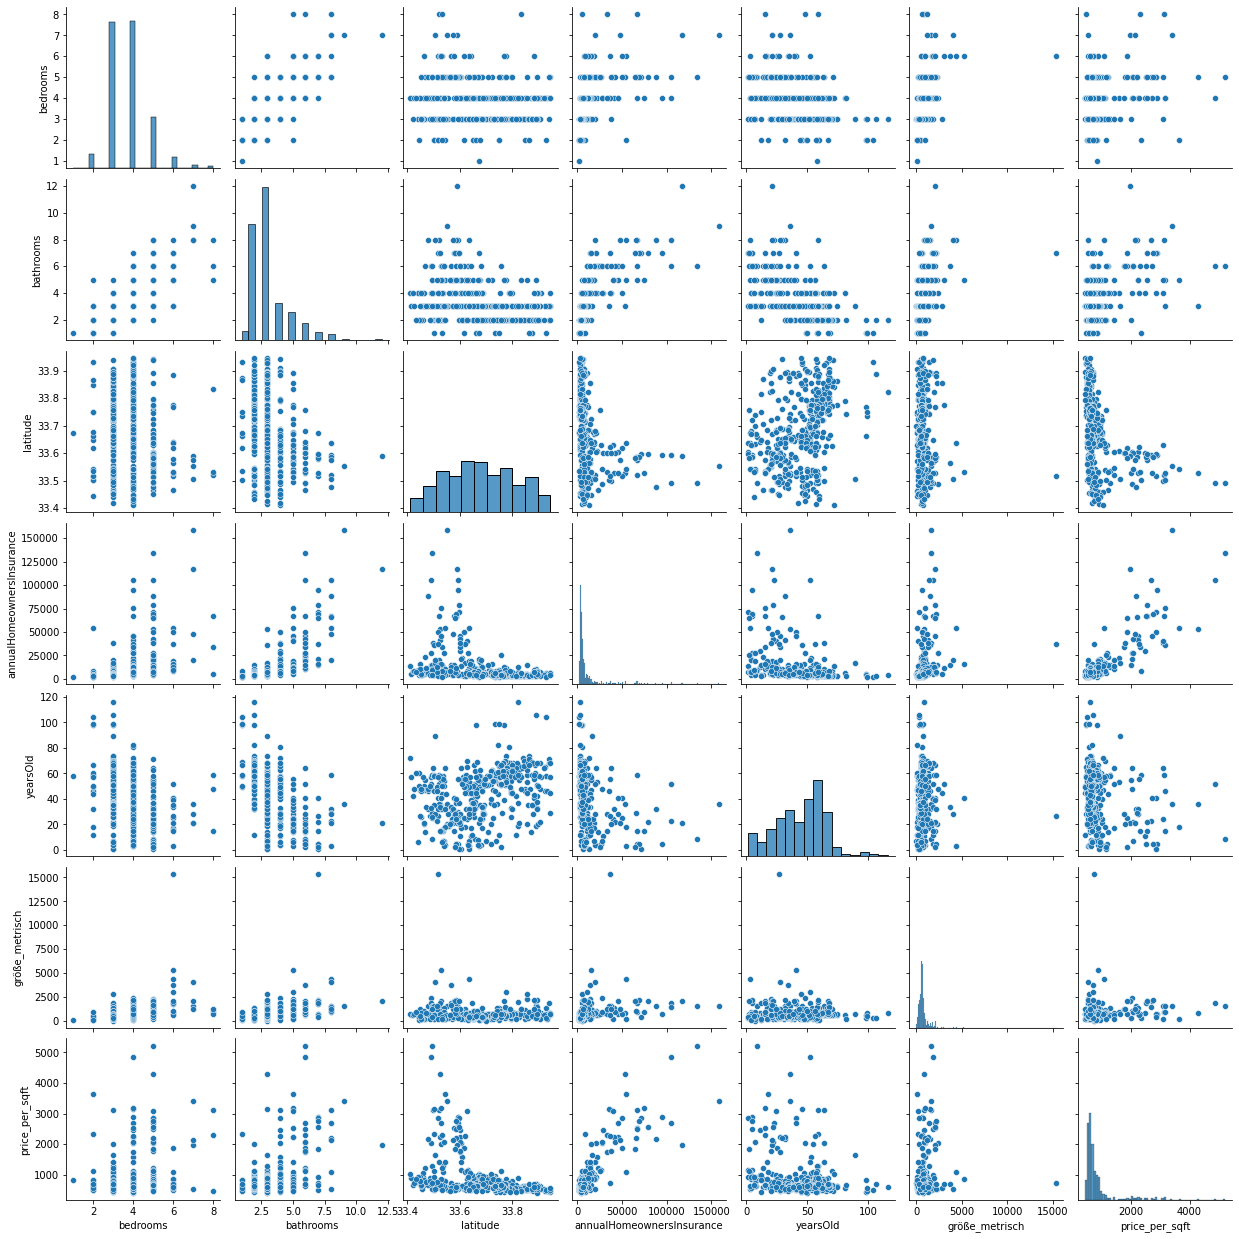

In [ ]:
sn.pairplot(df6[['bedrooms', 'bathrooms', 'latitude', 'annualHomeownersInsurance','yearsOld', 'größe_metrisch','price_per_sqft']])

# Model Building



In [ ]:
X.shape

(423, 6)

In [ ]:
y.shape

(423,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.4711566974141269

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80675944, 0.78650913, 0.64548985, 0.77139408, 0.744457  ])

In [ ]:
lr_clf.coef_ # using to check if a model is over-fitting

array([-4.15438984e+01, -7.20650625e+01, -7.66665239e+02,  3.56654875e-02,
        1.29492465e+00, -3.99297816e-02])


We can see that in 5 iterations we get a score close to 80% and above. This is pretty good, but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose:

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.750922,{'normalize': False}
1,lasso,0.750539,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.696327,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
LR = LinearRegression(normalize=False)
LR.fit(X_train.values, y_train.values)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

2 input examples to test our prediction:

In [ ]:
test_data = np.array([4, 3,	33.592022, 6090, 30,	447.420848])
print(LR.predict(test_data.reshape(1,6)))

[752.89928077]


In [ ]:
test_data = np.array([3,	2,	33.820520,	3763,	67,	668.901600])
print(LR.predict(test_data.reshape(1,6)))

[647.40171259]


Now we can compare the 2 score with the df below:
- Prediction: 752.899 (Actual score: 651.0 )
- Prediction: 647.402 (Actual score: 501.0 )

In [ ]:
check_df = df6[['bedrooms', 'bathrooms', 'latitude', 'annualHomeownersInsurance','yearsOld', 'größe_metrisch','price_per_sqft']]
check_df

,bedrooms,bathrooms,latitude,annualHomeownersInsurance,yearsOld,größe_metrisch,price_per_sqft
0,4,3,33.592022,6090,30,447.420848,651.0
1,3,3,33.579700,6657,27,313.547625,619.0
2,3,3,33.572502,4095,22,137.589343,608.0
3,5,4,33.571663,5879,24,384.618420,667.0
5,3,2,33.820520,3763,67,668.901600,501.0
...,...,...,...,...,...,...,...
566,3,2,33.889317,3360,106,323.395343,704.0
569,4,2,33.897762,4406,50,984.307285,642.0
571,4,3,33.881317,7560,59,2144.835800,702.0
572,4,3,33.892838,5040,38,731.611125,593.0


#Save & load the model

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:  # 'model_pickle' will be the name of the file in which we are saving the model
  pickle.dump(LR,f)

In [ ]:
with open('model_pickle','rb') as f:
  new_model = pickle.load(f)

In [ ]:
new_model.predict(test_data.reshape(1,6))

array([647.40171259])

#Other Model - Neural Network - Not used for our Application.


In [ ]:
import keras
import numpy as np
import pandas as pd

In [ ]:
X = df6.drop(columns='price_per_sqft')[['bedrooms', 'bathrooms', 'latitude', 'annualHomeownersInsurance','yearsOld', 'größe_metrisch']]
y = df6['price_per_sqft']
X

,bedrooms,bathrooms,latitude,annualHomeownersInsurance,yearsOld,größe_metrisch
0,4,3,33.592022,6090,30,447.420848
1,3,3,33.579700,6657,27,313.547625
2,3,3,33.572502,4095,22,137.589343
3,5,4,33.571663,5879,24,384.618420
5,3,2,33.820520,3763,67,668.901600
...,...,...,...,...,...,...
566,3,2,33.889317,3360,106,323.395343
569,4,2,33.897762,4406,50,984.307285
571,4,3,33.881317,7560,59,2144.835800
572,4,3,33.892838,5040,38,731.611125


In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(6, activation='relu', input_shape=(6,)))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X, Y, epochs=30, callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 354593.0625 

14/14 [==============================] - 1s 5ms/step - loss: 354593.0625
Epoch 2/30
 1/14 [=>............................] - ETA: 0s - loss: 369403.0000

14/14 [==============================] - 0s 4ms/step - loss: 300952.0312
Epoch 3/30
 1/14 [=>............................] - ETA: 0s - loss: 300588.3125

14/14 [==============================] - 0s 3ms/step - loss: 281835.6250
Epoch 4/30
 1/14 [=>............................] - ETA: 0s - loss: 426352.0312

14/14 [==============================] - 0s 3ms/step - loss: 285727.2812
Epoch 5/30
 1/14 [=>............................] - ETA: 0s - loss: 206676.7969

14/14 [==============================] - 0s 3ms/step - loss: 289272.8750
Epoch 6/30
 1/14 [=>............................] - ETA: 0s - loss: 666502.0625

14/14 [==============================] - 0s 3ms/step - loss: 287789.7188
Epoch 7/30
 1/14 [=>............................] - ETA: 0s - loss: 123268.9297

14/14 [==============================] - 0s 2ms/step - loss: 284662.6875
Epoch 8/30
 1/14 [=>............................] - ETA: 0s - loss: 166687.4062

14/14 [==============================] - 0s 4ms/step - loss: 285023.5625
Epoch 9/30
 1/14 [=>............................] - ETA: 0s - loss: 237573.5938

14/14 [==============================] - 0s 3ms/step - loss: 288799.5312
Epoch 10/30
 1/14 [=>............................] - ETA: 0s - loss: 202558.8906

14/14 [==============================] - 0s 2ms/step - loss: 285889.1250
Epoch 11/30
 1/14 [=>............................] - ETA: 0s - loss: 528847.7500

14/14 [==============================] - 0s 2ms/step - loss: 288694.1875
Epoch 12/30
 1/14 [=>............................] - ETA: 0s - loss: 152898.2500

14/14 [==============================] - 0s 2ms/step - loss: 279264.5000
Epoch 13/30
 1/14 [=>............................] - ETA: 0s - loss: 350365.8750

14/14 [==============================] - 0s 2ms/step - loss: 271985.3750
Epoch 14/30
 1/14 [=>............................] - ETA: 0s - loss: 196943.3438

14/14 [==============================] - 0s 3ms/step - loss: 296157.5000
Epoch 15/30
 1/14 [=>............................] - ETA: 0s - loss: 299063.5625

14/14 [==============================] - 0s 3ms/step - loss: 285058.2188
Epoch 16/30
 1/14 [=>............................] - ETA: 0s - loss: 307406.1875

14/14 [==============================] - 0s 2ms/step - loss: 281336.5938
Epoch 17/30
 1/14 [=>............................] - ETA: 0s - loss: 494818.5625

14/14 [==============================] - 0s 2ms/step - loss: 276935.5312
Epoch 18/30
 1/14 [=>............................] - ETA: 0s - loss: 209971.2500

14/14 [==============================] - 0s 3ms/step - loss: 281094.5312
Epoch 19/30
 1/14 [=>............................] - ETA: 0s - loss: 255258.2500

14/14 [==============================] - 0s 3ms/step - loss: 279085.2500
Epoch 20/30
 1/14 [=>............................] - ETA: 0s - loss: 155811.1562

14/14 [==============================] - 0s 3ms/step - loss: 280231.9062
Epoch 21/30
 1/14 [=>............................] - ETA: 0s - loss: 230358.5938

14/14 [==============================] - 0s 4ms/step - loss: 276674.0312
Epoch 22/30
 1/14 [=>............................] - ETA: 0s - loss: 257550.7188

14/14 [==============================] - 0s 3ms/step - loss: 285467.4375
Epoch 23/30
 1/14 [=>............................] - ETA: 0s - loss: 333419.2500

14/14 [==============================] - 0s 3ms/step - loss: 284169.6875
Epoch 24/30
 1/14 [=>............................] - ETA: 0s - loss: 624458.1250

14/14 [==============================] - 0s 3ms/step - loss: 307422.7812
Epoch 25/30
 1/14 [=>............................] - ETA: 0s - loss: 159625.6250

14/14 [==============================] - 0s 3ms/step - loss: 286652.6250
Epoch 26/30
 1/14 [=>............................] - ETA: 0s - loss: 466825.5000

14/14 [==============================] - 0s 3ms/step - loss: 282874.1250
Epoch 27/30
 1/14 [=>............................] - ETA: 0s - loss: 131493.4688

14/14 [==============================] - 0s 4ms/step - loss: 275233.7812
Epoch 28/30
 1/14 [=>............................] - ETA: 0s - loss: 305942.1250

14/14 [==============================] - 0s 3ms/step - loss: 279669.1875
Epoch 29/30
 1/14 [=>............................] - ETA: 0s - loss: 487336.2188

14/14 [==============================] - 0s 3ms/step - loss: 279359.7188
Epoch 30/30
 1/14 [=>............................] - ETA: 0s - loss: 159129.9375

14/14 [==============================] - 0s 2ms/step - loss: 280651.6562


Prediction is much worse than our initial regression model:

In [ ]:
test_data = np.array([4, 3,	33.592022, 6090, 30,	447.420848])
print(model.predict(test_data.reshape(1,6), batch_size=1))

[[328.79092]]


In [ ]:
check_df

,bedrooms,bathrooms,latitude,annualHomeownersInsurance,yearsOld,größe_metrisch,price_per_sqft
0,4,3,33.592022,6090,30,447.420848,651.0
1,3,3,33.579700,6657,27,313.547625,619.0
2,3,3,33.572502,4095,22,137.589343,608.0
3,5,4,33.571663,5879,24,384.618420,667.0
5,3,2,33.820520,3763,67,668.901600,501.0
...,...,...,...,...,...,...,...
566,3,2,33.889317,3360,106,323.395343,704.0
569,4,2,33.897762,4406,50,984.307285,642.0
571,4,3,33.881317,7560,59,2144.835800,702.0
572,4,3,33.892838,5040,38,731.611125,593.0


#Application Building


In [ ]:
! pip install streamlit -q

In [ ]:
%%writefile app.py
import streamlit as st
st.write('# Hello World')
st.write('## Hello Team')


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

In [ ]:
import streamlit as st
import pandas as pd
#import shap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor


In [ ]:
X

In [ ]:
%%writefile app.py
import streamlit as st

st.write("""
#House Price Prediction App
This app predicts the **House Price**!
""")
st.write('---')

# Loads the Boston House Price Dataset
df_orange = pd.read_csv('Orangeforapp')
X = pd.DataFrame(df_orange.data, columns=boston.feature_names)
Y = pd.DataFrame(df_orange.target, columns=["PRICE"])

# Sidebar
# Header of Specify Input Parameters
st.sidebar.header('Specify Input Parameters')

def user_input_features():
    BED = st.sidebar.slider('BED', X.bedrooms.min(), X.bedrooms.max(), X.bedrooms.mean())
    BATH = st.sidebar.slider('BATH', X.bathrooms.min(), X.bathrooms.max(), X.bathrooms.mean())
    LIVING = st.sidebar.slider('LIVING', X.livingArea.min(), X.livingArea.max(), X.livingArea.mean())
    AGE = st.sidebar.slider('AGE', X.yearsOld.min(), X.yearsOld.max(), X.yearsOld.mean())
    SIZE = st.sidebar.slider('SIZE', X.größe_metrisch.min(), X.größe_metrisch.max(), X.größe_metrisch.mean())
    data = {'BED': BED,
            'BATH': BATH,
            'LIVING': LIVING,
            'AGE': AGE,
            'SIZE': SIZE}
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()

# Main Panel

# Print specified input parameters
st.header('Specified Input parameters')
st.write(df)
st.write('---')

# Build Regression Model
model = RandomForestRegressor()
model.fit(X, Y)
# Apply Model to Make Prediction
prediction = model.predict(df)

st.header('Prediction of MEDV')
st.write(prediction)
st.write('---')

# Explaining the model's predictions using SHAP values
# https://github.com/slundberg/shap
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(X)

st.header('Feature Importance')
plt.title('Feature importance based on SHAP values')
shap.summary_plot(shap_values, X)
st.pyplot(bbox_inches='tight')
st.write('---')

plt.title('Feature importance based on SHAP values (Bar)')
shap.summary_plot(shap_values, X, plot_type="bar")
st.pyplot(bbox_inches='tight')

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501